### Introduction

   As a marketing consulting employee in Thailand, the purpose of this analysis is to examine the impact of photo content on user engagement on Facebook. In this analysis, it was analyzed if photos are the most engaging type of content or not and if reactions are evoked by the different types of posts and how do customers react. 
    Furthermore, groups of people was analyzed to understand their characteristics and preferences to be applied to new marketing strategies. The before mentioned, was done by employing Principal Component Analysis (PCA) and k-means clustering. 
    Logistic regression modeling was used to predict the likelihood of content being a photo and its implications on engagement since with the results of the regressions data-driven decisions can be taken concerning the use of photo content in the context of social media engagement in Thailand.


In [1]:
### Importing necessary libraries

import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca
from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix, roc_auc_score # results analysis                       
import sklearn.linear_model                                 # classification modeling


########################################
# importing packages
########################################
import numpy                 as np  # mathematical essentials
import pandas                as pd  # data science essentials
import matplotlib.pyplot     as plt # fundamental data visualization
import seaborn               as sns # enhanced visualizations

# packages for unsupervised learning
from sklearn.preprocessing   import StandardScaler      # standard scaler
from sklearn.decomposition   import PCA                 # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering


In [2]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')

    plt.axvline(x=3, color='red', linestyle='--', linewidth=2) 

    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = list(df.columns)
    
    return new_df

In [3]:
### Loading Data

fb_df = pd.read_excel('/Users/soniasorto/Desktop/Hult/Spring/Introduction to Machine Learning/Individual Assignment/facebook_live_data.xlsx'
)

### Checking Data

fb_df.head(5)

,status_id,status_type,time_published,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,photo,2023-07-04 22:45:00,0,0,150,0,0,0,0,0
1,2,photo,2023-06-23 01:01:00,2,3,202,7,1,0,0,0
2,3,photo,2023-06-21 02:23:00,4,0,200,8,1,0,0,0
3,4,video,2023-06-14 05:16:00,100,30,303,23,1,5,0,0
4,5,video,2023-06-08 08:28:00,173,47,132,16,1,0,1,0


In [4]:
### Descriptive Statistics

fb_df.info()
fb_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   status_id       2362 non-null   int64         
 1   status_type     2362 non-null   object        
 2   time_published  2362 non-null   datetime64[ns]
 3   num_comments    2362 non-null   int64         
 4   num_shares      2362 non-null   int64         
 5   num_likes       2362 non-null   int64         
 6   num_loves       2362 non-null   int64         
 7   num_wows        2362 non-null   int64         
 8   num_hahas       2362 non-null   int64         
 9   num_sads        2362 non-null   int64         
 10  num_angrys      2362 non-null   int64         
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 203.1+ KB


,status_id,time_published,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,2362.00000,2362,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000
mean,1181.50000,2022-01-17 21:45:45.673158144,233.729890,39.822185,221.147756,12.827265,1.282388,0.740051,0.260373,0.122777
min,1.00000,2017-09-27 02:58:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,591.25000,2021-03-25 16:10:15,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1181.50000,2023-01-28 04:36:30,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1771.75000,2023-05-17 11:30:30,23.000000,3.000000,186.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,2362.00000,2023-08-25 21:08:00,10960.000000,1260.000000,4315.000000,421.000000,278.000000,102.000000,46.000000,31.000000
std,681.99499,NaN,856.359157,123.780440,467.312818,40.997534,8.718397,4.111450,1.842239,0.904222


In [5]:
### Checking null values

fb_df.isna().sum()

status_id         0
status_type       0
time_published    0
num_comments      0
num_shares        0
num_likes         0
num_loves         0
num_wows          0
num_hahas         0
num_sads          0
num_angrys        0
dtype: int64

In [6]:
### Creating a table to analyze reactions

# Creating column with the total reactions

fb_df['total_reactions'] = fb_df['num_likes'] + fb_df['num_loves'] + fb_df['num_wows'] + fb_df['num_hahas'] + fb_df['num_sads'] + fb_df['num_angrys']

# Grouping by status type  the total reactions column to analyze reactions
grouped = fb_df.groupby('status_type')['total_reactions'].agg(['sum', 'mean', 'median', 'std', 'count']).round()


print(grouped) 

                sum   mean  median    std  count
status_type                                     
photo        256657  178.0    33.0  448.0   1443
text          73303  470.0   110.0  679.0    156
video        228371  299.0   162.0  469.0    763


### Photo analysis


##### In terms of reactions (likes, loves, etc.), how do photos perform when compared to other forms of content? Are they leading in terms of total engagement? What about in engagement on specific reactions? 

   The total amount of rows is 2,362, photos being the most common form of content with 1443 (61%) data points. Text posts have the highest mean reactions (470), suggesting that on average, text is the one receiving more reactions.  However, they have a smaller presence in the dataset (156 posts, 6%) compared to photos and videos (763 posts). Photo posts frequency might dilute their average engagement, meaning less attention per post. 
   Since mean measure can be easily communicated and compared across different types of contents it was decided this measure to be used in terms of analyzing specific reactions. In "likes" the three types of data have similar ratios, meaning people tend to like the content regardless of the data type. For "loves" videos and photos have the highest proportions of them, although videos are leading in this category suggesting a higher emotional impact or preference for video content. For "wow" reactions, photos have a very noticeable high proportion in comparison to the other data types. "Hahas," "sads," and "angrys" are less likely reactions since their ratios appear to be smaller, but in the three categories, photos tend to receive more of them, while videos receive more "hahas" and text more "sads." 
   In conclusion, photos tend to receive more 'hahas', 'sads', and 'angrys' suggesting that photos evoke a broader range of emotional responses, while specific content types like videos for 'hahas' and text for 'sads' suggest more targeted emotional impacts.
   

In [7]:
## Creating Scree Plot

# dropping demographic information
fb= fb_df.drop(['status_id', 'status_type', 'time_published', 'total_reactions'], axis = 1)


# applying the unsupervised_scaler function
fb_scaled = scaler(df = fb)



# checking pre- and post-scaling variance
print(np.var(fb), '\n\n')
print(np.var(fb_scaled), '\n\n')

num_comments    733040.526533
num_shares       15315.110634
num_likes       218288.813477
num_loves         1680.086166
num_wows            75.978259
num_hahas           16.896863
num_sads             3.392409
num_angrys           0.817271
dtype: float64 


num_comments    1.0
num_shares      1.0
num_likes       1.0
num_loves       1.0
num_wows        1.0
num_hahas       1.0
num_sads        1.0
num_angrys      1.0
dtype: float64 




/Users/soniasorto/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3745: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


### Developing PCAs and  Scree Plot

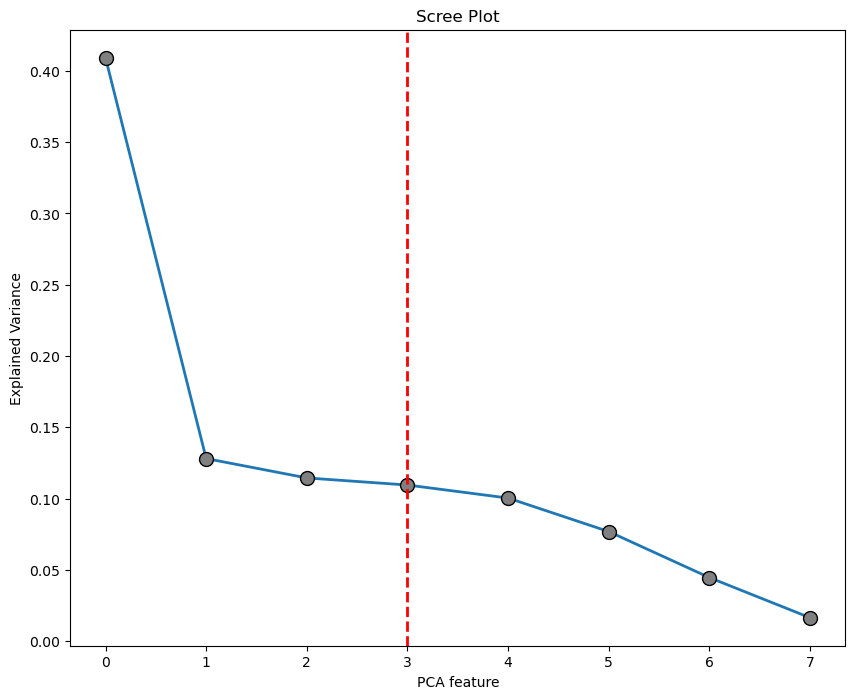

In [8]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 702)


# FITTING and TRANSFORMING the scaled data
fb_pca = pca.fit_transform(fb_scaled)



# calling the scree_plot function
scree_plot(pca_object = pca)


In [9]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.409
PC 2: 0.128
PC 3: 0.115
PC 4: 0.11
PC 5: 0.1
PC 6: 0.077
PC 7: 0.045
PC 8: 0.017


In [10]:
# INSTANTIATING a new model using the first three principal components
pca_3 = PCA(n_components = 3,
            random_state = 702)


# FITTING and TRANSFORMING the purchases_scaled
customer_pca_3 = pca_3.fit_transform(X = fb_scaled)

In [11]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(fb_scaled.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(fb_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


3 Components Factor Loadings
------------------------------
{factor_loadings_3.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                 0     1     2     3     4     5     6     7
num_comments  0.41 -0.31 -0.03 -0.20 -0.39 -0.18  0.67 -0.24
num_shares    0.49 -0.12  0.05 -0.17 -0.21 -0.22 -0.33  0.71
num_likes     0.16  0.73 -0.35  0.25 -0.49  0.11  0.05  0.00
num_loves     0.50  0.00  0.06 -0.08  0.01 -0.06 -0.56 -0.65
num_wows      0.30  0.48  0.08 -0.08  0.64 -0.42  0.29  0.04
num_hahas     0.37  0.01 -0.05 -0.20  0.28  0.84  0.14  0.12
num_sads      0.20 -0.35 -0.68  0.54  0.27 -0.09 -0.01  0.03
num_angrys    0.22 -0.04  0.63  0.72 -0.04  0.11  0.11  0.04


3 Components Factor Loadings
------------------------------
                 0     1     2
num_comments  0.41 -0.31 -0.03
num_shares    0.49 -0.12  0.05
num_likes     0.16  0.73 -0.35
num_loves     0.50  0.00  0.06
num_wows      0.30  0.48  0.08
num_hahas     0.37  0.01 -0.05
num_sads      0.20 -0.35 -0.68
num_angrys    0.22 -0.04  0.63



In [12]:
# naming each principal component
factor_loadings_3.columns = ['Social Butterflies', 
                           'Quiet Charmers',      
                           'Emotion Stirrer']   


# checking the result
factor_loadings_3.head(n=8).round(2)

,Social Butterflies,Quiet Charmers,Emotion Stirrer
num_comments,0.41,-0.31,-0.03
num_shares,0.49,-0.12,0.05
num_likes,0.16,0.73,-0.35
num_loves,0.50,0.00,0.06
num_wows,0.30,0.48,0.08
num_hahas,0.37,0.01,-0.05
num_sads,0.20,-0.35,-0.68
num_angrys,0.22,-0.04,0.63


#### Interpreting Principal Components

##### PC 0: Social Butterfly

The Social Butterflies Component shows significant positive loadings for num_loves,  num_shares, and num_comments. This indicates that the component is associated with proactive engagement behaviors where users not only react to content but also participate through commenting, sharing, and expressing affection ('loves'). It might be interpreted as an 'active engagement' component. An example of social butterflies people are adults between their 40's and 60's, which actively show and express their opinions without caring what others have to say about them. This types of posts may be games, posts that ask for opinions, controversial statements or questions that spark debate and heartwarming stories.

The other side of Social Butterflies are people who like to be incognito. They spend time in social media continuously but like to be mysterious, not wanting to appear on someone else's feed and not wanting to show what they like. The types of posts that will have no reactions are generic or ones that lack a strong call to action, leading to fewer comments.


##### PC 1: Quiet Charmers

Quiet Charmers Component shows significant positive loadings for num_likes and num_wows. This component seems to represent a general endorsement or appreciation of content, possibly capturing content that is well-received or impresses the audience but may not necessarily lead to active engagement or strong emotional reactions. An example of Quiet Charmers people would be teenagers and young adults who like to keep up with trends and enjoy reacting to content because that way they will receive more of that kind of content in their feeds. This types of posts would usually be striking images or videos that elicit a 'wow' reaction or that are very entertaining that are widely 'liked,' such as dancing trends, or makeup, sports scorings, etc. Also, educational or informative posts that people appreciate and react to.

The contrary of Quiet Charmers people are people that use social media for an exact purpose like housewives who tend to look for certain recipes to cook, or tricks for cleaning households, hairstyles for their girls, etc. That is why this type of posts are for a certain niche content and does not resonate with a broad audience, leading to fewer 'likes'.


##### PC 2: Emotion Stirrers

Emotion Stirrers are people that react with anger to content that evokes sadness. It might reflect content that generates a strong emotional response, whether it's controversy, injustice, politics, sports or other emotive factors that tend to divide opinion or generate frustration. This posts evoke strong emotional responses, particularly anger or indignation, and are less likely to make users sad.

On the other hand, people who tend to react 'sads' is people who tend to be sensitive about news in an emotional way that does not evoke anger but sadness. Posts like this relate to sad news or events, which could increase the num_sads reaction. But this type of posts are not controversial or challenging enough to elicit anger or strong disagreement, resulting in lower 'angry' reactions.




### Clustering

In [13]:
# analyzing factor strengths per customer
factor_loadings = pca_3.transform(fb_scaled)


# converting to a DataFrame
factor_loadings_df = pd.DataFrame(data = factor_loadings)


# renaming columns
factor_loadings_df.columns = factor_loadings_3.columns


In [14]:
# applying the unsupervised_scaler function
pca_rescaled = scaler(df = factor_loadings_df )


# checking pre- and post-scaling variance
print(np.var(factor_loadings_df), '\n\n')
print(np.var(pca_rescaled))

Social Butterflies    3.273609
Quiet Charmers        1.025052
Emotion Stirrer       0.916344
dtype: float64 


Social Butterflies    1.0
Quiet Charmers        1.0
Emotion Stirrer       1.0
dtype: float64


/Users/soniasorto/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3745: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [17]:
# INSTANTIATING a k-Means object with five clusters
fb_k_pca = KMeans(n_clusters   = 3     ,
                  n_init       = 'auto',
                  random_state = 702   )


# fitting the object to the data
fb_k_pca.fit(pca_rescaled)


# converting the clusters to a DataFrame
fb_kmeans_pca = pd.DataFrame({'Cluster': fb_k_pca.labels_})


# checking the results
print(fb_kmeans_pca.iloc[: , 0].value_counts())

Cluster
1    2138
0     135
2      89
Name: count, dtype: int64


#### Deciding ideal number of clusters

When deciding the ideal amount of clusters for the KMeans algorithm it was considered that to have a better understanding on the characteristics of the data it is better to have variance between clusters since small clusters may represent outliers rather than meaningful groups. Because of this, it was decided that the optimal number of clusters was three because initially four clusters were created, but a group of two appeared as the last cluster, representing a significant imbalance and no meaningful value. With 5 clusters groups of two and six were added, therefore it was decided that the optimal clustering was three, showing more balance but dominance of a cluster. 


#### Renaming segments

In [18]:
# storing cluster centers
centroids_pca = fb_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(data = centroids_pca).round(decimals = 2)


# renaming principal components
centroids_pca_df.columns = [ 'Social Butterflies',
                             'Quiet Charmers',
                             'Emotion Stirrer']


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(decimals = 2)

,Social Butterflies,Quiet Charmers,Emotion Stirrer
0,0.41,2.94,-1.09
1,-0.18,-0.13,0.10
2,3.77,-1.40,-0.78


In [19]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([fb_kmeans_pca,
                         factor_loadings_df],
                         axis = 1)


# concatenating demographic information with pca-clusters
final_df = pd.concat([fb_df.loc[ : , ['status_type']],
                      clst_pca_df.round(decimals = 2)],
                      axis = 1)


# renaming columns
final_df.columns = ['status_type', 'Cluster',
                    'Social Butterflies',
                    'Quiet Charmers',
                    'Emotion Stirrer']


# checking the results
print(final_df.head(n = 5))

  status_type  Cluster  Social Butterflies  Quiet Charmers  Emotion Stirrer
0       photo        1               -0.62           -0.01             0.03
1       photo        1               -0.47            0.13             0.01
2       photo        1               -0.47            0.13             0.02
3       video        1                0.37            0.24            -0.09
4       video        1               -0.02           -0.28            -0.28


In [20]:
# dynamic string with value counts for each demographic (cluster 0)
cluster_id = 0  # cluster 1
cluster_filter = final_df['Cluster'] == cluster_id

print(f"""\
 -----------
| Cluster {cluster_id} |
 -----------

Proportion of Observations
--------------------------
{round(len(final_df[cluster_filter]) / len(final_df), ndigits = 2)}


Centroids
---------
{clst_pca_df.loc[cluster_id].to_string(float_format="{:0.2f}".format, dtype=False, name=False)}


Status Type
-----------
{final_df.loc[cluster_filter, "status_type"]
         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
""")



 -----------
| Cluster 0 |
 -----------

Proportion of Observations
--------------------------
0.06


Centroids
---------
Cluster               1.00
Social Butterflies   -0.62
Quiet Charmers       -0.01
Emotion Stirrer       0.03


Status Type
-----------
status_type
photo    0.54
text     0.21
video    0.24



#### Interpreting segments

##### Cluster 0


Cluster 0 has a -0.62 centroid for Social Butterflies indicating low engagement activity, such as commenting, liking or loving the post. It has a -0.01 centroid for Quiet Charmers which indicates that they do not tend to react with 'wows' or 'hahas'. They have a slight positive score as Emotion Stirrers, which suggest that they do show slight engagement to emotional content that leads to an angry reaction.


Post Example: A normal post for this segment might be a photo update of a serene landscape. It does not necessarily invite debate or a strong call to action, but it is pleasing to the eye and might elicit a simple 'like' or 'wow' from individuals who appreciate it passively.


##### Status Types

Photos are the preferred content type with a status type value of 0.54, suggesting most customers prefer to interact with photo content. This indicates that Cluster 0’s users are visually driven, perhaps responding better to visual cues than to text or video. They might be less proactive in engagement, but they still are visually engaged. This visual preference suggests that users in this cluster might have a more reflective or contemplative interaction style on social media, instead of engaging with content through comments or shares, they are more likely to process the content internally and respond with a mental note or an emotional reaction. Although they like photos more, they also look at text and videos in a lower scale.



In [21]:
# dynamic string with value counts for each demographic (cluster 1)
cluster_id = 1  # cluster 2

print(f"""\
 -----------
| Cluster {cluster_id} |
 -----------

Proportion of Observations
--------------------------
{round(len(final_df[final_df['Cluster'] == cluster_id]) / len(final_df), ndigits = 2)}


Centroids
---------
{clst_pca_df.loc[cluster_id].to_string(float_format="{:0.2f}".format, dtype=False, name=False)}


Status Type
-----------
{final_df.loc[final_df['Cluster'] == cluster_id, "status_type"]
         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
""")


 -----------
| Cluster 1 |
 -----------

Proportion of Observations
--------------------------
0.91


Centroids
---------
Cluster               1.00
Social Butterflies   -0.47
Quiet Charmers        0.13
Emotion Stirrer       0.01


Status Type
-----------
status_type
photo    0.64
text     0.06
video    0.30



#### Interpreting segments

##### Cluster 1


Cluster 1 has a -0.47 centroid for Social Butterflies indicating low engagement activity, such as commenting, liking or loving the post. It has a 0.13 centroid for Quiet Charmers indicating they are selective and less likely to interact with generic content, showing preference for posts that align with their specific interests. These users look for specificity, so content creators aiming to engage this group should focus on depth and expertise in their posts subjects.

Post Example: A typical post could be a a makeup tutorial. These posts might not expect viewers to share or comment, but they tend to gather 'likes' and 'wows' from those who appreciate the content's aesthetic or emotional appeal.


##### Status Types

Photos are the dominant content type with a status type value of 0.64, indicating a strong visual preference.
This segment is also visually oriented, but unlike Cluster 0, the slightly higher photo preference could suggest that this group appreciates and 'likes' content that is visually appealing or more resonant to their preferences.
This is why it may imply a tendency to appreciate content passively but with a little more inclination to express approval through 'likes' or 'wows'. Although this cluster shows a high preference for photos, they are also appreciative of videos (0.30), but text they do not like. This may be because of their desire of enjoying visually rather than text.



In [22]:
# dynamic string with value counts for each demographic (cluster 2)
cluster_id = 2  # cluster 3

print(f"""\
 -----------
| Cluster {cluster_id} |
 -----------

Proportion of Observations
--------------------------
{round(len(final_df[final_df['Cluster'] == cluster_id]) / len(final_df), ndigits = 2)}


Centroids
---------
{clst_pca_df.loc[cluster_id].to_string(float_format="{:0.2f}".format, dtype=False, name=False)}


Status Type
-----------
{final_df.loc[final_df['Cluster'] == cluster_id, "status_type"]
         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
""")

 -----------
| Cluster 2 |
 -----------

Proportion of Observations
--------------------------
0.04


Centroids
---------
Cluster               1.00
Social Butterflies   -0.47
Quiet Charmers        0.13
Emotion Stirrer       0.02


Status Type
-----------
status_type
photo    0.07
video    0.93



#### Interpreting segments

##### Cluster 2


Cluster 1 has a -0.47 centroid for Social Butterflies indicating low engagement activity, such as commenting, liking or loving the post. It has a 0.13 centroid for Quiet Charmers indicating they are selective and less likely to interact with generic content, showing preference for posts that align with their specific interests. These users look for specificity, so content creators aiming to engage this group should focus on depth and expertise in their posts subjects. And has 0.02 score in Emotional Stirrers which leads to the conclusion this people like to react with anger or indignation. 

Post Example: A video clip from the Russia / Ukraine war. The viewers in this cluster are not likely to share or comment but are more likely to react with an 'angry' emoji if the content is divisive or a 'wow' if it’s unexpectedly impressive.

##### Status Types

Cluster 2, varies completely in preferences from the other two clusters. Photos have the least preference with a status type value of 0.07, while videos has a preference of 0.93 and text does not even appear. This cluster's low preference for photos suggests that they are more likely to engage with more dynamic content and possibly narrative-driven. This might suggest that photo content might be too static or not sufficiently engaging for this segment, who might be seeking more intense experiences that video content can provide, immersing them into a broader exposure to the content. For Cluster 2 to engage with photo content, it may need to be highly fascinating or controversial to elicit a reaction, given their higher engagement with the Quiet Charmers and Emotion Stirrers components.


### Logistic Regression Models

##### Original x-features

In [23]:
################################
# MODEL 1: ORIGINAL X-FEATURES #
################################

# creating new column for y
fb_df['photo'] = (fb_df['status_type'] == 'photo').astype(int)

# selecting x- and y-data
x_data1 = fb_df[['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 
             'num_hahas', 'num_sads', 'num_angrys']]
y_data1 = fb_df['photo']

# scaling x features 
x_scaled1 = scaler(df = x_data1)

# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled1, 
                                                    y_data1, 
                                                    test_size    = 0.25, 
                                                    random_state = 702,
                                                    stratify     = y_data1)

# INSTANTIATING a logistic regression model
model1 = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                 C            = 1,
                                                 random_state = 702)


# FITTING the training data
model1_fit = model1.fit(x_train, y_train)


# PREDICTING based on the testing set
model1_pred = model1_fit.predict(x_test) # predict_proba for multiclass


# checking results
train_acc = model1_fit.score(x_train, y_train)
test_acc  = model1_fit.score(x_test , y_test )
roc_score = roc_auc_score  (y_true  = y_test,
                            y_score = model1_pred)


print(f"""
Training ACCURACY: {round(model1_fit.score(x_train, y_train), ndigits = 3)}
Testing  ACCURACY: {round(model1_fit.score(x_test , y_test ), ndigits = 3)}
Train-Test Gap: {round(abs(train_acc - test_acc), ndigits = 3)}
Test AUC Score: {round(roc_score, ndigits = 3)}
""")

# unpacking the confusion matrix
model1_tn, \
model1_fp, \
model1_fn, \
model1_tp = confusion_matrix(y_true = y_test, y_pred = model1_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model1_tn}
False Positives: {model1_fp}
False Negatives: {model1_fn}
True Positives : {model1_tp}
""")


Training ACCURACY: 0.755
Testing  ACCURACY: 0.741
Train-Test Gap: 0.014
Test AUC Score: 0.678


True Negatives : 91
False Positives: 139
False Negatives: 14
True Positives : 347



##### Retained Principal Components


In [24]:

# selecting x- and y-data
x_data3 = fb_pca
y_data3 = fb_df['photo']


# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data3,
                                                    y_data3,
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    stratify     = y_data3)

In [26]:
# INSTANTIATING a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                random_state = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model_fit.predict(x_test) # predict_proba for multiclass


# checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test , y_test )
roc_score = roc_auc_score  (y_true      = y_test,
                            y_score     = model_pred)


print(f"""
Training ACCURACY: {round(model1_fit.score(x_train, y_train), ndigits = 3)}
Testing  ACCURACY: {round(model1_fit.score(x_test , y_test ), ndigits = 3)}
Train-Test Gap: {round(abs(train_acc - test_acc), ndigits = 3)}
Test AUC Score: {roc_score.round(decimals = 3)}
""")

# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


Training ACCURACY: 0.696
Testing  ACCURACY: 0.684
Train-Test Gap: 0.014
Test AUC Score: 0.678


True Negatives : 91
False Positives: 139
False Negatives: 14
True Positives : 347



/Users/soniasorto/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/soniasorto/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


##### Retained Clusters


In [27]:
# factorizing cluster results 
cluster_df = pd.get_dummies(data       = fb_kmeans_pca['Cluster'],
                            drop_first = True).astype(dtype = int)


# checking results
cluster_df.value_counts(normalize = False).sort_index(ascending = False)

1  2
1  0    2138
0  1      89
   0     135
Name: count, dtype: int64

In [28]:
# selecting x- and y-data
x_data2 = cluster_df
y_data2 = fb_df['photo']


# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data2,
                                                    y_data2,
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    stratify     = y_data2)

In [36]:
# INSTANTIATING a logistic regression model
model2 = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                random_state = 702)


# FITTING the training data
model_fit = model2.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model_fit.predict(x_test) # predict_proba for multiclass


# checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test , y_test )
roc_score = roc_auc_score  (y_true  = y_test,
                            y_score = model_pred)


print(f"""
Training ACCURACY: {round(model_fit.score(x_train, y_train), ndigits = 3)}
Testing  ACCURACY: {round(model_fit.score(x_test , y_test ), ndigits = 3)}
Train-Test Gap: {round(abs(train_acc - test_acc), ndigits = 3)}
Test AUC Score: {round(roc_score, ndigits = 3)}
""")

# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


Training ACCURACY: 0.648
Testing  ACCURACY: 0.629
Train-Test Gap: 0.019
Test AUC Score: 0.527


True Negatives : 15
False Positives: 215
False Negatives: 4
True Positives : 357



### Model Selection and Model Results

Model 1 (original x-features) and Model 2 (retained principal components) have a similar AUC score, while Model 3 (retained clusters) has the lowest one. Regarding the train-test gap, Model 2 worked better than Model 1 by a slight difference, and for Model 3 the train-test gao is the largest. Taking into consideration testing accuracy, which tells if the prediction of the test data was made properly, and AUC score which distinguishes between the classes effectively, and train-test gap, which tell us if the model's predictions are reliable, the best model would be model 1 since it has the highest testing accuracy and AUC score and small test-train gap, which also tells that it did not overfit data. 

#### Confusion Matrix for Model 1

True Negatives : 91

False Positives: 139

False Negatives: 14

True Positives : 347

True Negatives: This is the correct count of negative predictions. This model predicted 91 posts not to be photos and they were accurately predicted.   
False Positives: This model predicted 139 false positives, this category represents posts that were incorrectly labeled as photos when they were not photos.
False Negatives: 14 posts were predicted not to be photos when they actually were. This represents that photos were incorrectly labeled by the model.
True Positives: 347 photos were predicted to be photos and were actually photos. 

The results of this confusion matrix shows that model is better at identifying posts that are photos rather than those that are not photos, this shows a bias towards the positive class in the model's prediction which may happen because there is more photo content type in the dataset than videos and text. The behavior of False Positives affects the False Negatives showing a relatively low number of them.

